In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('/kaggle/input/credit-card-customers/BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


* CLIENTNUM - Müşteri numarası
* Attrition_Flag - Müşteri etkinliği
* Customer_Age - Müşterinin yaşı
* Gender - Cinsiyet
* Dependent_count - Bakmakla yükümlü olduğu kişi sayısı
* Education_Level - Eğitim seviyesi
* Marital_Status - Medeni hali
* Income_Category - Yıllık gelir 
* Card_Category - Kart katogorisi
* Months_on_book - Bankayla ilişki süresi
* Total_Relationship_Count  - Toplam ürün sayısı
* Months_Inactive_12_mon - Son 12 aydaki aktif olmadığı ay sayısı
* Contacts_Count_12_mon - Son 12 aydaki bankayla temas sayısı
* Credit_Limit - Kredi limiti
* Total_Revolving_Bal - Toplam devreden borç miktarı
* Avg_Open_To_Buy - Satın almaya açık kredi limiti
* Total_Amt_Chng_Q4_Q1 - Son çeyrekte işlem tutarındaki değişim 
* Total_Trans_Amt - Toplam işlem tutarı
* Total_Trans_Ct - Toplam işlem sayısı
* Total_Ct_Chng_Q4_Q1 - Son çeyrekte işlem sayısındaki değişim
* Avg_Utilization_Ratio - Ortalama kart kullanım oranı

In [4]:
df.shape

(10127, 23)

In [5]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [6]:
#veri analizinde işe yaramayan son iki sutunu kaldırdım 
df=df[['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
          'Dependent_count', 'Education_Level', 'Marital_Status',
          'Income_Category', 'Card_Category', 'Months_on_book',
          'Total_Relationship_Count', 'Months_Inactive_12_mon',
          'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
          'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
          'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]
        
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [7]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


* Müşterinin bankada geçirdiği en uzun süre 56 ay(max)
* Müşterinin sahip olduğu ortalama ürün sayısı 4 ( ort ve medyan örtüşmektedir)
* Ortalama kredi limiti 8,6 bin dolar, ancak medyan 4,5 bin dolar. (Bu değişkende bazı çarpıklıklara işaret eder.)

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [9]:
df.Attrition_Flag.unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [10]:
Attrited = df[df.Attrition_Flag == 'Attrited Customer']

In [11]:
Attrited.shape

(1627, 21)

In [12]:
Existing = df[df.Attrition_Flag == 'Existing Customer']

In [13]:
Existing.shape

(8500, 21)

In [14]:
df['Attrition_Flag'].value_counts(normalize=True)

Attrition_Flag
Existing Customer    0.83934
Attrited Customer    0.16066
Name: proportion, dtype: float64

* Müşterilerin %16,07'si kredi kartlarını iptal etmiş.

In [15]:
df.Income_Category.unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [16]:
value_counts = df.Income_Category.value_counts()

In [17]:
df.Income_Category.value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

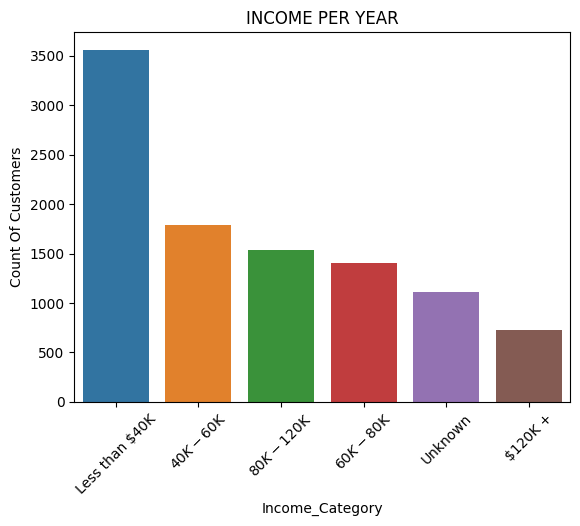

In [18]:
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.title('INCOME PER YEAR')
plt.ylabel('Count Of Customers')
plt.xticks(rotation=45)
plt.show()

* Banka müşterilerinin çoğunluğunun yıllık $40K dan az kazandığını görüyoruz

In [19]:
Existing.Income_Category.value_counts()

Income_Category
Less than $40K    2949
$40K - $60K       1519
$80K - $120K      1293
$60K - $80K       1213
Unknown            925
$120K +            601
Name: count, dtype: int64

In [20]:
val_counts = Existing.Income_Category.value_counts()

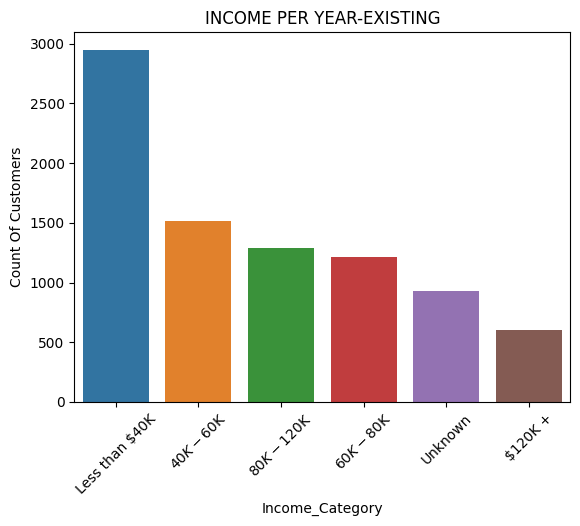

In [21]:
sns.barplot(x=val_counts.index, y=val_counts.values)
plt.title('INCOME PER YEAR-EXISTING')
plt.ylabel('Count Of Customers')
plt.xticks(rotation=45)
plt.show()

In [22]:
Attrited.Income_Category.value_counts()

Income_Category
Less than $40K    612
$40K - $60K       271
$80K - $120K      242
$60K - $80K       189
Unknown           187
$120K +           126
Name: count, dtype: int64

In [23]:
v_counts = Attrited.Income_Category.value_counts()

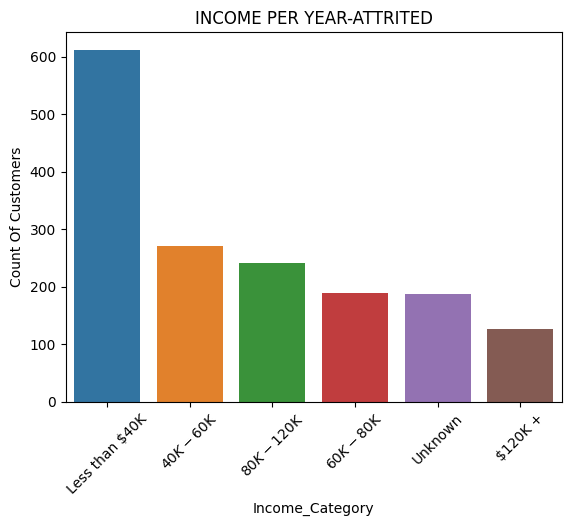

In [24]:
sns.barplot(x=v_counts.index, y=v_counts.values)
plt.title('INCOME PER YEAR-ATTRITED')
plt.ylabel('Count Of Customers')
plt.xticks(rotation=45)
plt.show()

* Mevcut ve giden müşterilerin büyük kısmının yıllık gelirinin $40K dan az olduğunu görüyoruz.
* Bu grafiklere bakarak yıllık gelirin kredi kartını iptal etmede kesin bir etkisini göremeyiz.

In [26]:
print(df['Customer_Age'].min())
print(df['Customer_Age'].max())

26
73


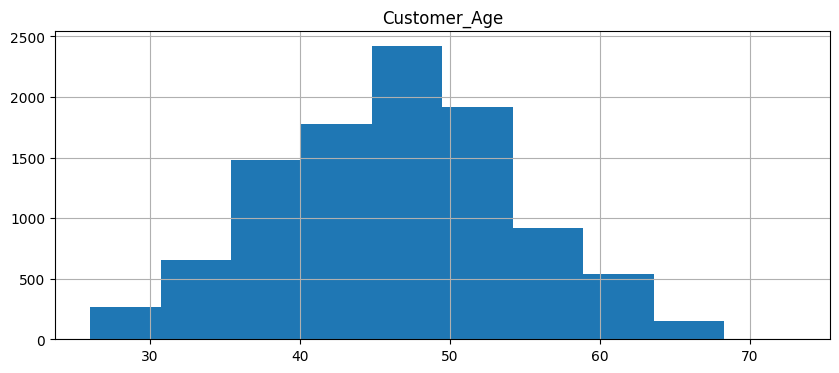

In [27]:
features = ["Customer_Age"]
df[features].hist(figsize=(10, 4));

* Burada müşterilerin yaşa göre dağılımında normal dağılım olduğunu görüyoruz. Müşterilerin çoğunluğu 40'lı yaşlarında.

In [28]:
Attrited.Customer_Age.min()

26

In [29]:
Attrited.Customer_Age.max()

68

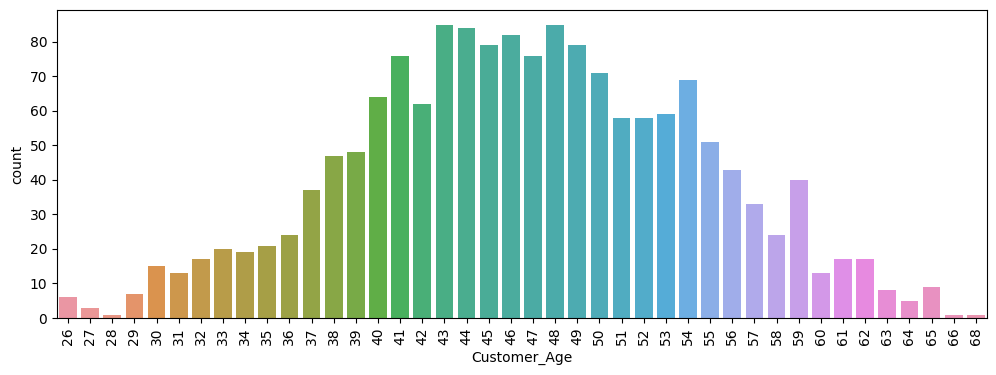

In [30]:
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
sns.countplot(x="Customer_Age", data=Attrited )
plt.xticks(rotation=90);

* Kredi kartını kapatan müşterlerin yaş dağılımına bakıldığında 37-59 yaş aralığında bir yoğunluk olduğunu görüyoruz.

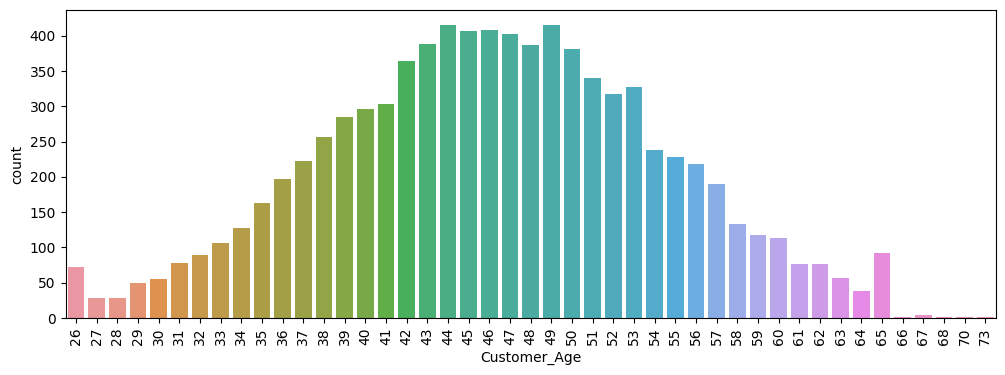

In [31]:
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
sns.countplot(x="Customer_Age", data=Existing )
plt.xticks(rotation=90);

In [32]:
Attrited.Dependent_count.unique()

array([0, 1, 2, 4, 5, 3])

In [33]:
att = Attrited.Dependent_count.value_counts()

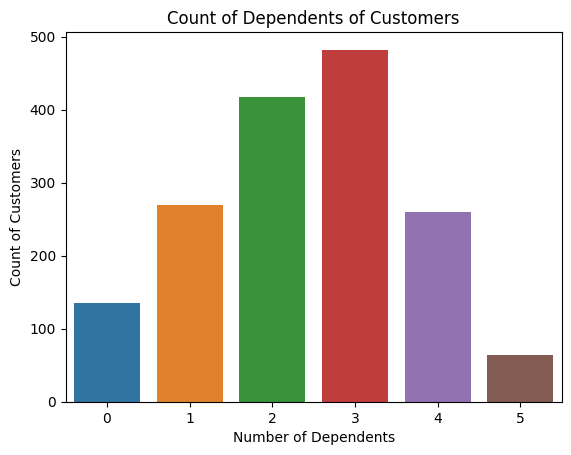

In [34]:
sns.barplot(x= att.index, y = att.values)
plt.xlabel('Number of Dependents')
plt.ylabel('Count of Customers')
plt.title('Count of Dependents of Customers')
plt.show()

* Giden müşterilerin çoğunluğu 2 veya 3 kişiye bakmakla yükümlü olan kişiler olduklarını görüyoruz.


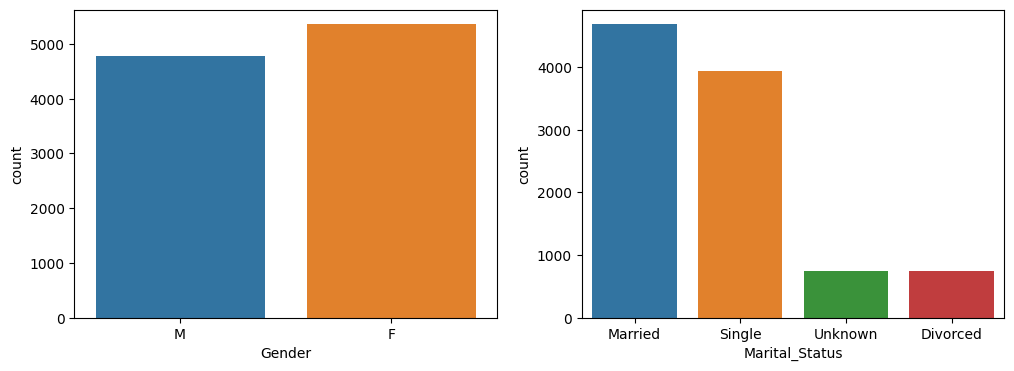

In [35]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="Gender", data=df, ax=axes[0])
sns.countplot(x="Marital_Status", data=df, ax=axes[1]);

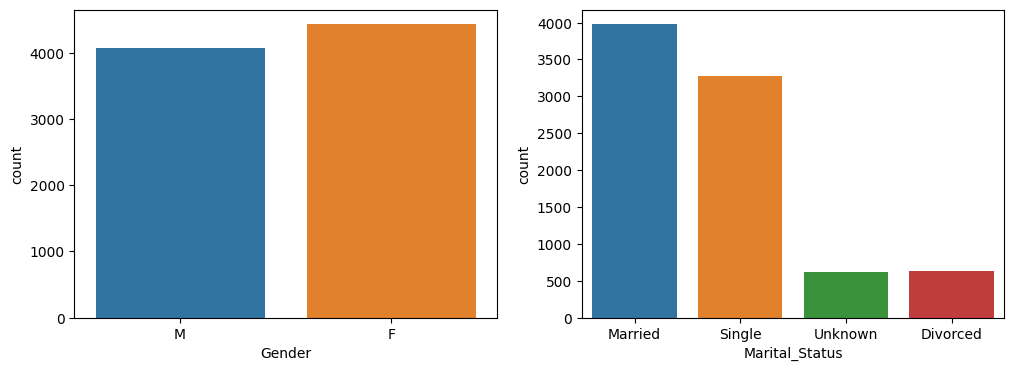

In [36]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="Gender", data=Existing, ax=axes[0])
sns.countplot(x="Marital_Status", data=Existing, ax=axes[1]);

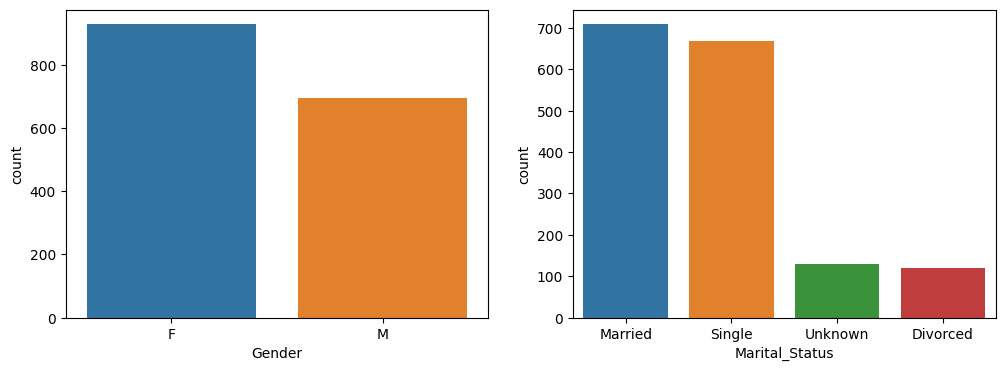

In [37]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="Gender", data=Attrited, ax=axes[0])
sns.countplot(x="Marital_Status", data=Attrited, ax=axes[1]);

* Grafikleri karşılaştırdığımızda iki grup arasında medeni hal açısından anlamlı bir fark yoktur.
* Giden müşterilerin cinsiyetine baktığımızda kadınların erkeklerden daha fazla olduğunu görüyoruz.

In [38]:
Attrited.Total_Revolving_Bal.value_counts().sort_index().head()

Total_Revolving_Bal
0      893
132      1
134      1
145      1
154      1
Name: count, dtype: int64

* Giden müşterilerden sadece 893 tanesinin bankaya borcu yok.
* Diğer 734 müşterinin bankaya borcu olduğunu görüyoruz.

In [40]:
Existing.Total_Revolving_Bal.value_counts().sort_index().head()

Total_Revolving_Bal
0      1577
429       1
451       1
456       1
461       1
Name: count, dtype: int64

* Aktif müşterilerden sadece 1577 tanesinin bankaya borcu yok.
* Bu demek oluyor ki 6923 aktif müşteri bankaya borçlu.
* Sonuç olarak iki grubu karşılaştırdığımızda bankaya borcu olan müşterilerin kredi kartını aktif olarak kullanmaya daha meyilli olduğunu görüyoruz.

In [41]:
df["Education_Level"].value_counts()

Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

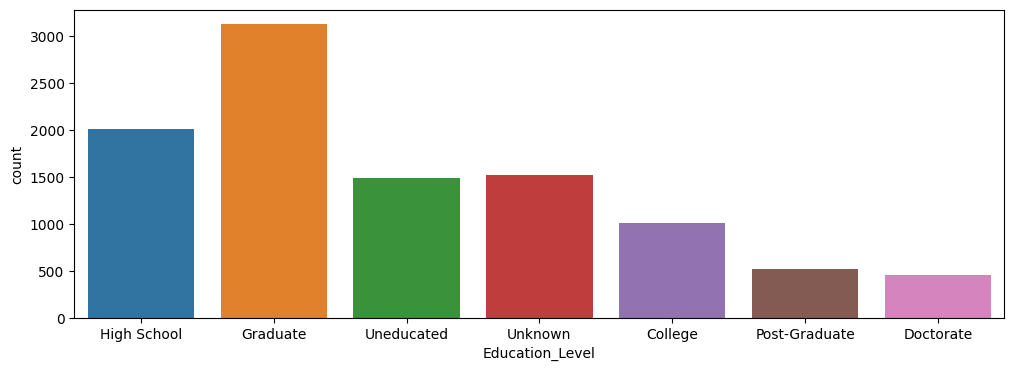

In [42]:
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

sns.countplot(x="Education_Level", data=df);

In [43]:
el = Existing.Education_Level.value_counts()

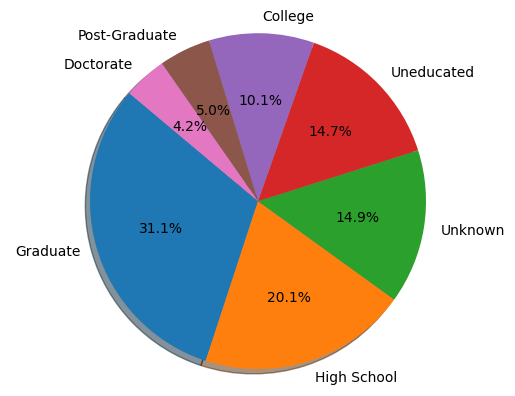

In [44]:
plt.pie(el, labels=el.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [45]:
atr = Attrited.Education_Level.value_counts()

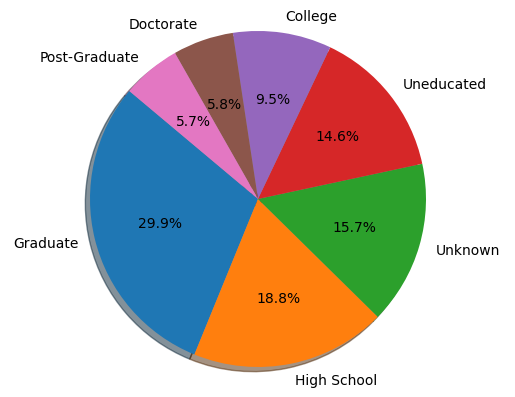

In [46]:
plt.pie(atr, labels=atr.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

* Müşterilerin çoğunluğunun üniversite mezunu olduğu gözlenmektedir.
* Giden ve kalanlar arasında eğitim seviyesi açısından anlamlı bir fark gözükmemektedir.

In [47]:
Female = df[df.Gender == 'F']

In [48]:
fel = Female.Education_Level.value_counts()

In [49]:
Male = df[df.Gender == 'M']

In [50]:
mel = Male.Education_Level.value_counts()

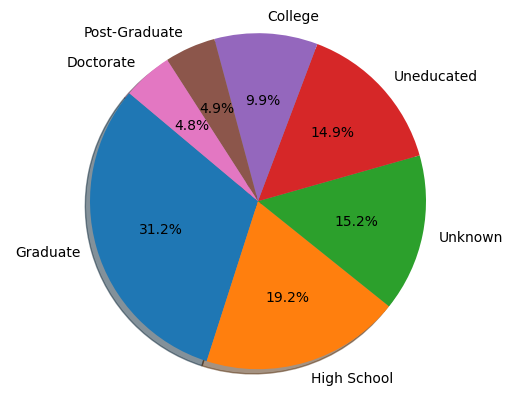

In [51]:
plt.pie(fel, labels=fel.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

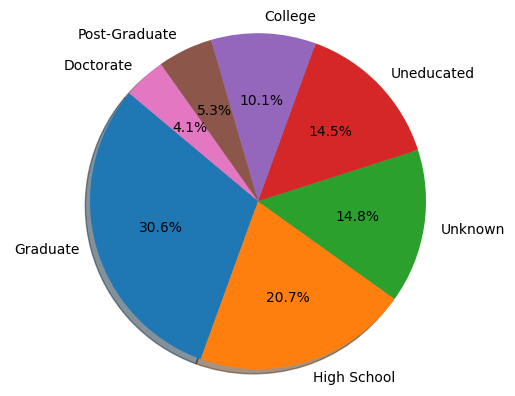

In [52]:
plt.pie(mel, labels=mel.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

* Erkek ve kadın müşterilerin eğitim seviyeleri birbirlerine benzer seviyede bulunmuştur.

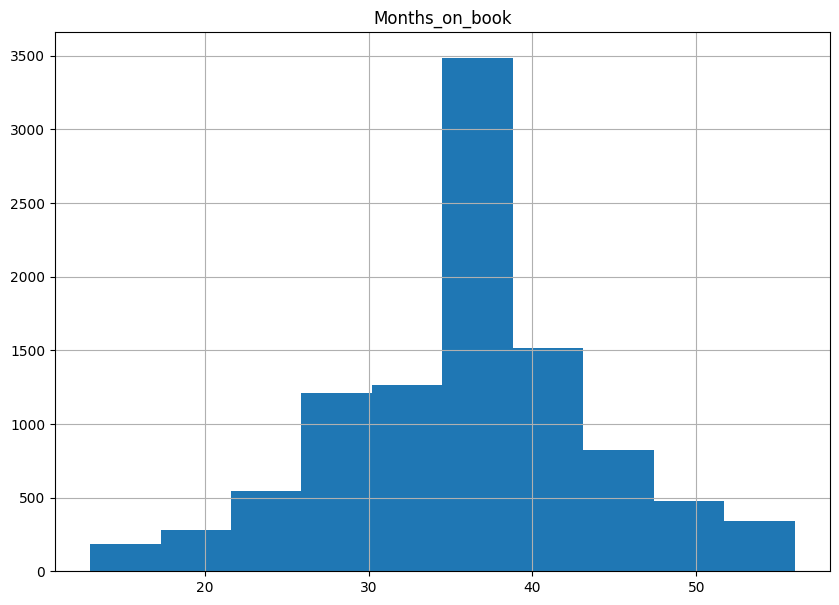

In [53]:
features = [ "Months_on_book"]
df[features].hist(figsize=(10, 7));

* 36. ayda yaklaşık 3500 müşteri var. Bu durum o dönemde bir pazarlama kampanyası olabileceğini gösteriyor.

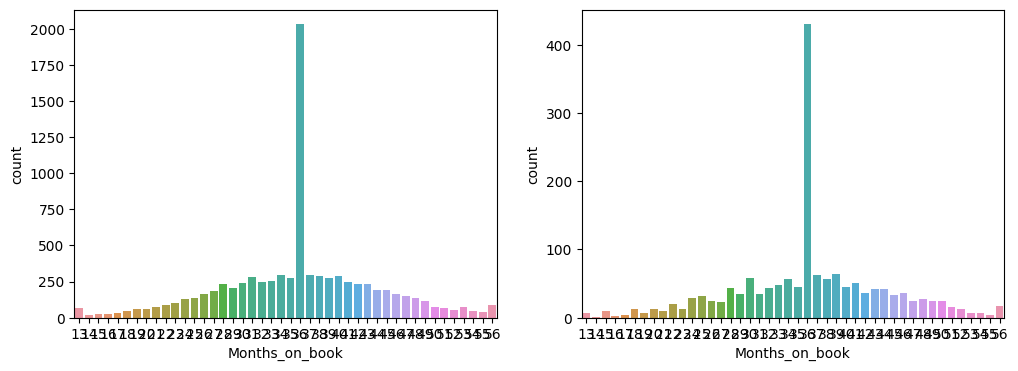

In [54]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="Months_on_book", data=Existing, ax=axes[0])
sns.countplot(x="Months_on_book", data=Attrited, ax=axes[1]);

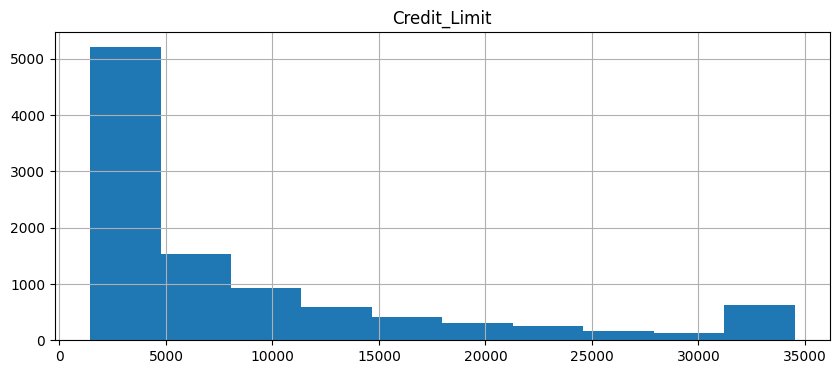

In [55]:
features = ["Credit_Limit"]
df[features].hist(figsize=(10, 4));

* Kredi limitinin çarpık bir değişken olduğu ve yüksek kredi limitlerine sahip birkaç müşteri tarafından daha yükseğe kaydırıldığı açıktır.
* Müşterilerin çoğunluğunun kredi limiti 5000 doların altındadır.

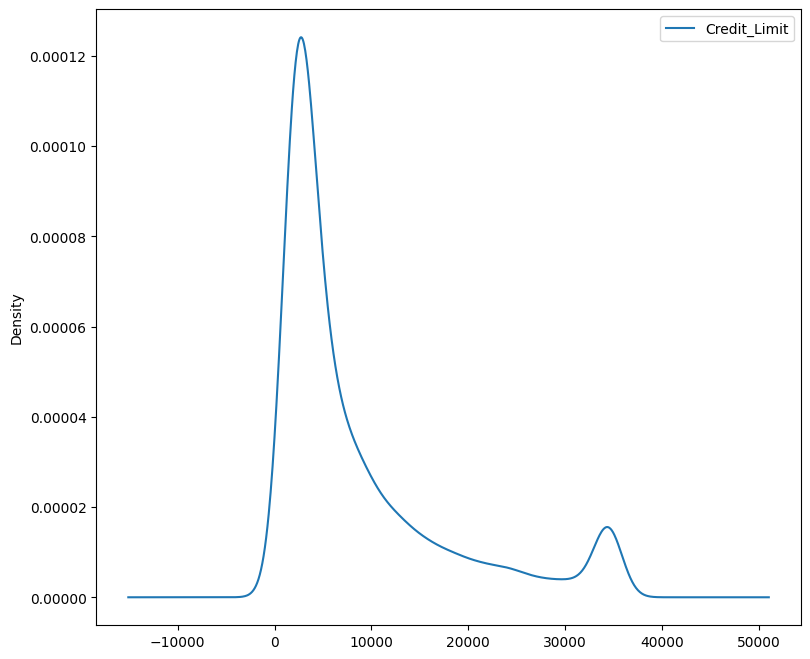

In [56]:
df[features].plot(
    kind="density", subplots=True, layout=(1,2), sharex=False, figsize=(20, 8)
);

/tmp/ipykernel_32/2305185356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Credit_Limit"]);


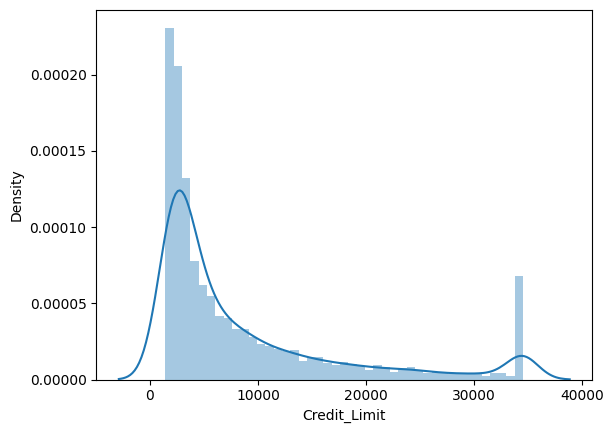

In [57]:
sns.distplot(df["Credit_Limit"]);

<Axes: xlabel='Gender', ylabel='Credit_Limit'>

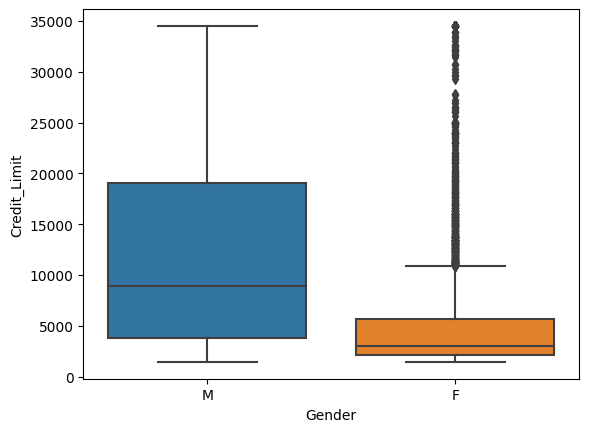

In [58]:
sns.boxplot(x="Gender", y="Credit_Limit", data=df)

* Kredi limitlerini cinsiyete göre değerlendirdiğimizde erkeklerin kadınlara göre oldukça yüksek limitleri olduğu görülmektedir. 
* Bunu anlamlandırmak için gelir düzeylerine bir bakalım.

In [59]:
Female = df[df.Gender == 'F']

In [60]:
Male = df[df.Gender == 'M']

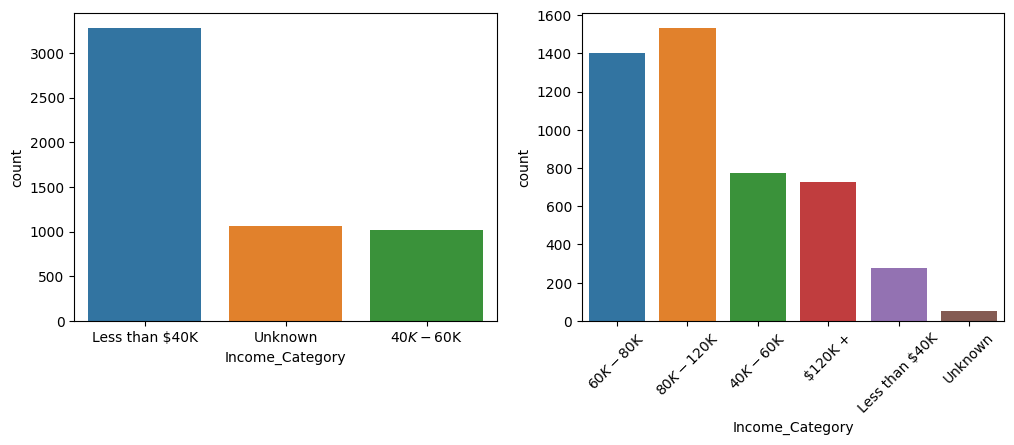

In [61]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="Income_Category", data=Female, ax=axes[0])
sns.countplot(x="Income_Category", data=Male, ax=axes[1])
plt.xticks(rotation=45);

* Kadın ve erkeklerin gelir düzeyleri karşılaştırıldığında kadınların büyük çoğunluğunun yıllık geliri 40000 doların altındadir. 60000 doların üzerinde geliri olan kadın yoktur.
* Daha önce incelediğimiz grafikte kadın ve erkeklerin eğitim seviyeleri benzer bulunmuştur.
* Gelirleri arasındaki farklılığa baktığımızda kadınların aynı eğitim seviyesinde olmasına rağmen erkeklerden daha düşük gelire sahip olduğu görülmektedir.

<Axes: xlabel='Gender', ylabel='Total_Trans_Ct'>

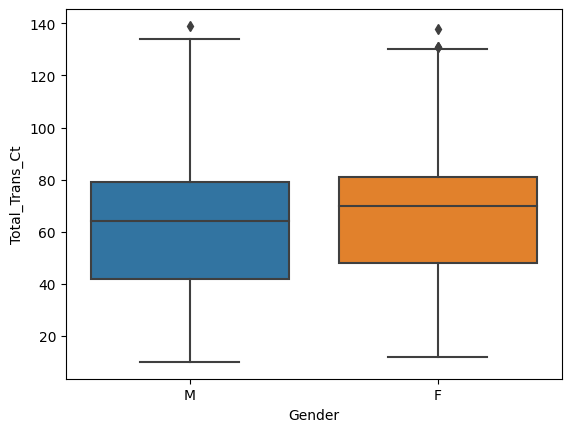

In [62]:
sns.boxplot(x="Gender", y="Total_Trans_Ct", data=df)

* Bu grafik bize, ortalama işlem sayısının kadınlarda erkeklere göre biraz daha yüksek olduğunu ve her iki grupta da aykırı değerlerin mevcut olduğunu gösteriyor.

In [63]:
df['Total_Trans_Amt_bin'] = pd.cut(
    df['Total_Trans_Amt'],
    bins=[0, 4000, 11000, 20000],
    labels=['Bellow $4K','$4K-$11K', 'Above $11K'],
    include_lowest=True,
    right=False)
    
df.groupby(['Total_Trans_Amt_bin', 'Attrition_Flag']).agg({
     'CLIENTNUM':'nunique',
    'Customer_Age': 'mean',
    'Dependent_count': 'mean',
    'Months_on_book': 'mean',
    'Total_Relationship_Count': 'mean',
    'Months_Inactive_12_mon': 'mean',
    'Contacts_Count_12_mon': 'mean',
    'Credit_Limit': 'mean',
    'Total_Revolving_Bal': 'mean',
    'Avg_Open_To_Buy': 'mean',
    'Total_Amt_Chng_Q4_Q1': 'mean',
    'Total_Trans_Amt': 'mean',
    'Total_Trans_Ct': 'mean',
    'Total_Ct_Chng_Q4_Q1': 'mean',
    'Avg_Utilization_Ratio': 'mean'
  }).T

Total_Trans_Amt_bin             Bellow $4K                    \
Attrition_Flag           Attrited Customer Existing Customer   
CLIENTNUM                      1318.000000       3969.000000   
Customer_Age                     46.921093         45.959688   
Dependent_count                   2.411229          2.220962   
Months_on_book                   36.440819         35.677501   
Total_Relationship_Count          3.343703          4.426304   
Months_Inactive_12_mon            2.704856          2.252708   
Contacts_Count_12_mon             2.998483          2.533384   
Credit_Limit                   6709.901517       9528.692492   
Total_Revolving_Bal             659.874052       1299.792643   
Avg_Open_To_Buy                6050.027466       8228.899849   
Total_Amt_Chng_Q4_Q1              0.655160          0.796533   
Total_Trans_Amt                2071.312595       2443.855883   
Total_Trans_Ct                   39.809560         51.489544   
Total_Ct_Chng_Q4_Q1               0.511991          0.743642   
Avg_Utilization_Ratio             0.180264          0.282306   

Total_Trans_Amt_bin               $4K-$11K                    \
Attrition_Flag           Attrited Customer Existing Customer   
CLIENTNUM                       309.000000       3784.000000   
Customer_Age                     45.543689         46.808404   
Dependent_count                   2.365696          2.468023   
Months_on_book                   35.058252         36.265063   
Total_Relationship_Count          3.006472          3.685254   
Months_Inactive_12_mon            2.644013          2.307347   
Contacts_Count_12_mon             2.860841          2.196617   
Credit_Limit                  14219.048544       6834.273626   
Total_Revolving_Bal             728.055016       1189.389271   
Avg_Open_To_Buy               13490.993528       5644.884355   
Total_Amt_Chng_Q4_Q1              0.861123          0.746775   
Total_Trans_Amt                7461.543689       4990.805761   
Total_Trans_Ct                   66.789644         78.470930   
Total_Ct_Chng_Q4_Q1               0.735217          0.739636   
Avg_Utilization_Ratio             0.086599          0.334132   

Total_Trans_Amt_bin             Above $11K                    
Attrition_Flag           Attrited Customer Existing Customer  
CLIENTNUM                              0.0        747.000000  
Customer_Age                           NaN         45.101740  
Dependent_count                        NaN          2.271754  
Months_on_book                         NaN         35.012048  
Total_Relationship_Count               NaN          2.357430  
Months_Inactive_12_mon                 NaN          2.215529  
Contacts_Count_12_mon                  NaN          2.224900  
Credit_Limit                           NaN      14053.797858  
Total_Revolving_Bal                    NaN       1367.615797  
Avg_Open_To_Buy                        NaN      12686.182062  
Total_Amt_Chng_Q4_Q1                   NaN          0.775229  
Total_Trans_Amt                        NaN      14698.396252  
Total_Trans_Ct                         NaN        110.336011  
Total_Ct_Chng_Q4_Q1                    NaN          0.750190  
Avg_Utilization_Ratio                  NaN          0.180288

* Geliri 4-11 bin dolar arasında olan ve kredi kartını kapatan müşterilerin kredi limiti incelendiğinde yaklaşık 14 bin dolar olduğu izlenmektedir. Yıllık geliri 11 bin doların üzerinde olan ve kredi kartı kullanımına devam eden müşterilerin de yine kredi limitlerinin 14 bin dolar civarında olması diğerlerine oranla az harcama yaptıklarını göstermektedir.
* Orta düzey geliri olan ve giden müşterilerin kredi limitleri, yüksek geliri olan müşterilerle aynı düzeyde olduğu gözükmektedir.

In [64]:
(df
    .groupby(['Attrition_Flag'])
    .agg({'CLIENTNUM':'nunique',  # number of unique customers in each group
          'Customer_Age': 'mean',  # the rest are looking at the mean per group
          'Dependent_count': 'mean',
          'Months_on_book': 'mean',
          'Total_Relationship_Count': 'mean',
          'Months_Inactive_12_mon': 'mean',
          'Contacts_Count_12_mon': 'mean',
          'Credit_Limit': 'mean',
          'Total_Revolving_Bal': 'mean',
          'Avg_Open_To_Buy': 'mean',
          'Total_Amt_Chng_Q4_Q1': 'mean',
          'Total_Trans_Amt': 'mean',
          'Total_Trans_Ct': 'mean',
          'Total_Ct_Chng_Q4_Q1': 'mean',
          'Avg_Utilization_Ratio': 'mean',})
        
    .transpose()
    .assign(Diff = (lambda x: (x['Attrited Customer'] / x['Existing Customer'] - 1)))
    .sort_values('Diff')
    .rename_axis(None, axis=1)
)

,Attrited Customer,Existing Customer,Diff
CLIENTNUM,1627.000000,8500.000000,-0.808588
Total_Revolving_Bal,672.822987,1256.604118,-0.464570
Avg_Utilization_Ratio,0.162475,0.296412,-0.451860
Total_Trans_Ct,44.933620,68.672588,-0.345683
Total_Trans_Amt,3095.025814,4654.655882,-0.335069
Total_Ct_Chng_Q4_Q1,0.554386,0.742434,-0.253286
Total_Relationship_Count,3.279656,3.914588,-0.162196
Total_Amt_Chng_Q4_Q1,0.694277,0.772510,-0.101271
Credit_Limit,8136.039459,8726.877518,-0.067703
Avg_Open_To_Buy,7463.216472,7470.273400,-0.000945


* Giden ve kalan müşteriler karşılaştırıldığında en belirgin farkın yaklaşık %45 ile Total_Revolving_Bal(toplam devreden borç) ve Avg_Utilization_Ratio (ortalama kart kullanım oranı) nda olduğu izlenmektedir. Bunu %35 ile Total_Trans_Ct(toplam işlem sayısı), Total_Trans_Amt (toplam işlem tutarı) ve %25 ile Total_Ct_Chng_Q4_Q1(ilk ve son çeyrekte kart kullanım oranı) izlemektedir.

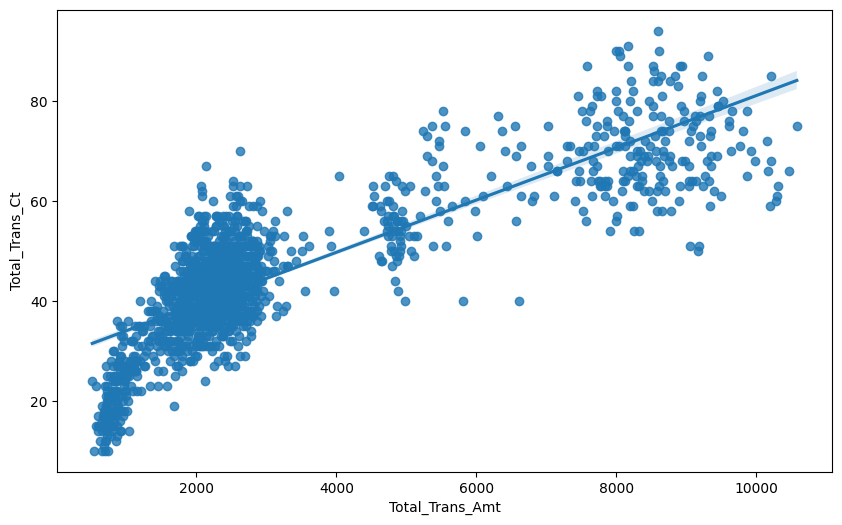

In [65]:
plt.figure(figsize=(10,6))
sns.regplot(x="Total_Trans_Amt", y="Total_Trans_Ct", data=Attrited)
plt.show()


* Kredi kartını iptal eden müşterilerin toplam işlem tutarı ve sayısının daha düşük olduğu görülmektedir.
* Bu durumda kredi kartından daha çok harcama yapan müşterilerin kartı kullanmaya devam ettiği görülmektedir.

TEST

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [70]:
x= df[[ "Customer_Age", 
          "Dependent_count", 
          "Months_on_book",
          "Total_Relationship_Count", "Months_Inactive_12_mon",
          "Contacts_Count_12_mon", "Credit_Limit", "Total_Revolving_Bal",
          "Avg_Open_To_Buy", "Total_Amt_Chng_Q4_Q1", "Total_Trans_Amt",
          "Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1", "Avg_Utilization_Ratio"]]
y = df.Attrition_Flag

In [71]:
x

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [72]:
y.unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [73]:
from sklearn.preprocessing import LabelEncoder 

In [74]:
encoder = LabelEncoder()

In [75]:
y = encoder.fit_transform(y)

In [76]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [77]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [78]:
X_train

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
5727,43,2,25,4,2,4,21961.0,0,21961.0,0.653,2237,39,0.393,0.000
533,59,0,53,4,3,2,5512.0,1124,4388.0,1.391,1975,49,1.579,0.204
3214,52,2,39,3,2,3,1629.0,978,651.0,0.552,3766,83,0.694,0.600
7579,56,2,45,3,3,1,3296.0,1435,1861.0,0.968,4327,66,0.737,0.435
7634,46,2,36,3,3,3,2418.0,1106,1312.0,0.963,3541,64,0.882,0.457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8470,59,0,49,2,3,2,9076.0,0,9076.0,0.899,3048,53,0.656,0.000
6061,57,3,36,6,2,3,3542.0,2417,1125.0,0.687,4127,71,0.479,0.682
9529,48,3,42,2,1,1,9742.0,2517,7225.0,0.692,13082,92,0.804,0.258
406,42,3,34,3,3,3,13450.0,0,13450.0,0.742,1000,18,0.059,0.000


In [79]:
classifier = KNeighborsClassifier()

In [80]:
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [81]:
y_pred = classifier.predict(X_test)

In [82]:
y_pred 

array([1, 1, 0, ..., 1, 1, 1])

In [83]:
pd.DataFrame(data={"Tahmin Değeri: ": encoder.inverse_transform(y_pred), "Gerçek Değeri:": encoder.inverse_transform(y_test), "Tahmin Doğruluğu": y_pred==y_test})

,Tahmin Değeri:,Gerçek Değeri:,Tahmin Doğruluğu
0,Existing Customer,Existing Customer,True
1,Existing Customer,Attrited Customer,False
2,Attrited Customer,Existing Customer,False
3,Existing Customer,Existing Customer,True
4,Attrited Customer,Existing Customer,False
...,...,...,...
3034,Existing Customer,Existing Customer,True
3035,Existing Customer,Existing Customer,True
3036,Existing Customer,Existing Customer,True
3037,Existing Customer,Existing Customer,True


In [84]:
from sklearn.metrics import accuracy_score

In [85]:
acc = accuracy_score(y_test, y_pred)

In [86]:
acc

0.8910825929582099

In [87]:
acc_score = accuracy_score(y_test, y_pred, normalize=False)

print(acc_score)

2708


In [88]:
y_test

array([1, 0, 1, ..., 1, 1, 1])

In [89]:
new_customer= pd.DataFrame({
          "Customer_Age":[21 , 51 , 26 ,72, 33, 28, 40, 59, 19, 35  ] ,
          "Dependent_count": [2 , 3 , 0, 5, 3, 3, 3, 1, 0, 1 ]  , 
          "Months_on_book": [10, 36, 10, 48, 62, 70, 21, 13, 8, 28 ] ,
          "Total_Relationship_Count": [5, 4 , 1, 10, 3, 7, 5, 8, 9, 15 ] , 
          "Months_Inactive_12_mon" : [3, 1, 6, 2, 5, 1, 1, 3, 2, 0] ,
          "Contacts_Count_12_mon": [3, 0, 2, 7, 1, 8, 0, 3, 5, 1] ,
          "Credit_Limit": [6015, 3418, 4200, 9655, 2400, 9712, 4716, 5600, 2705, 11300] , 
   "Total_Revolving_Bal": [1515, 0, 3000, 1700, 1400, 2400, 1250, 0, 800, 180] ,
       "Avg_Open_To_Buy": [4500, 3418, 1200, 7955, 1000, 7312, 4716, 5600,1905, 11120] , 
          "Total_Amt_Chng_Q4_Q1": [0.5, 2.5, 0.9, 0.5,0.6, 0.9, 2.1,0.7,0.8,0.3] , 
          "Total_Trans_Amt": [3200, 1887, 4222, 1918, 4108, 1615,816,2249,970, 5311] ,
          "Total_Trans_Ct": [61, 20, 21,83,66,53,28,15,28,48] , 
          "Total_Ct_Chng_Q4_Q1": [0.62, 2.3, 0.43,1.2,0.9,0.89,2.5,0.55,0.18,0.39] , 
          "Avg_Utilization_Ratio": [0.3, 0.0, 0.8,0.2,0.43,0.45,0.0,0.25,0.22,0.47]
})

In [90]:
prediction = classifier.predict(new_customer)

In [91]:
prediction

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1])

In [92]:
if prediction[0]==1 :
    print ("Existing Customer")
else:
    print("Attrited Customer")

Existing Customer
